In [4]:
! pip install ONE-api
!pip install brainbox
!pip install ibllib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.9/259.9 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [52]:
from one.api import ONE
import pandas as pd
import numpy as np
import brainbox.behavior.dlc as dlc
from matplotlib import pyplot as plt

In [5]:
from brainbox import singlecell, behavior


In [7]:
ONE.setup(silent=True)
one = ONE(password = "international")

Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"
Downloading: /root/Downloads/ONE/openalyx.internationalbrainlab.org/tmpvrwn4530/cache.zip Bytes: 4118421


100%|██████████| 3.9276323318481445/3.9276323318481445 [00:00<00:00,  8.75it/s]


In [8]:
eids = one.search(details = False,  query_type=None,
                  task_protocol ='_iblrig_tasks_ephysChoiceWorld6.4.2',
                  dataset = 'alf/rightCamera', subject = 'UCLA037')

len(eids)

3

In [9]:
eids

['bda2faf5-9563-4940-a80f-ce444259e47b',
 '8d316998-28c3-4265-b029-e2ca82375b2f',
 '2bdf206a-820f-402f-920a-9e86cd5388a4']

In [10]:
eid = eids[0]

desc = one.get_details(eid, full = True)

desc

{'subject': 'UCLA037',
 'users': ['12da3001', '82658a92', 'b301cbb8', 'bd2cd700', 'c331cf27'],
 'location': None,
 'procedures': [],
 'lab': 'churchlandlab_ucla',
 'projects': ['ibl_neuropixel_brainwide_01'],
 'type': 'Experiment',
 'task_protocol': '_iblrig_tasks_ephysChoiceWorld6.4.2',
 'number': 1,
 'start_time': '2022-02-10T15:25:25.061359',
 'end_time': '2022-02-10T16:07:20.061960',
 'narrative': '',
 'parent_session': None,
 'n_correct_trials': 439,
 'n_trials': 545,
 'url': 'https://openalyx.internationalbrainlab.org/sessions/bda2faf5-9563-4940-a80f-ce444259e47b',
 'extended_qc': {'task': 'PASS',
  'dlcBody': 'PASS',
  'dlcLeft': 'PASS',
  'behavior': 1,
  'dlcRight': 'FAIL',
  'videoBody': 'WARNING',
  'videoLeft': 'WARNING',
  'videoRight': 'FAIL',
  '_task_iti_delays': 0.3602941176470588,
  '_videoBody_focus': True,
  '_videoLeft_focus': True,
  '_videoRight_focus': True,
  '_task_goCue_delays': 1.0,
  '_task_trial_length': 0.998165137614679,
  '_task_stimOn_delays': 0.998165

In [11]:
mouseName = desc['subject']

mouseName

'UCLA037'

In [12]:
one.list_datasets(eid)

['alf/_ibl_bodyCamera.dlc.pqt',
 'alf/_ibl_bodyCamera.times.npy',
 'alf/_ibl_leftCamera.dlc.pqt',
 'alf/_ibl_leftCamera.features.pqt',
 'alf/_ibl_leftCamera.lightningPose.pqt',
 'alf/_ibl_leftCamera.times.npy',
 'alf/_ibl_rightCamera.dlc.pqt',
 'alf/_ibl_rightCamera.features.pqt',
 'alf/_ibl_rightCamera.times.npy',
 'alf/_ibl_trials.goCueTrigger_times.npy',
 'alf/_ibl_trials.stimOff_times.npy',
 'alf/_ibl_trials.table.pqt',
 'alf/_ibl_wheel.position.npy',
 'alf/_ibl_wheel.timestamps.npy',
 'alf/_ibl_wheelMoves.intervals.npy',
 'alf/_ibl_wheelMoves.peakAmplitude.npy',
 'alf/bodyCamera.ROIMotionEnergy.npy',
 'alf/bodyROIMotionEnergy.position.npy',
 'alf/leftCamera.ROIMotionEnergy.npy',
 'alf/leftROIMotionEnergy.position.npy',
 'alf/licks.times.npy',
 'alf/probe00/electrodeSites.brainLocationIds_ccf_2017.npy',
 'alf/probe00/electrodeSites.localCoordinates.npy',
 'alf/probe00/electrodeSites.mlapdv.npy',
 'alf/probe00/pykilosort/_ibl_log.info_pykilosort.log',
 'alf/probe00/pykilosort/_kilos

In [13]:
trialsTable = one.load_dataset(eid, 'alf/_ibl_trials.table.pqt')
spikeTimes = one.load_dataset(eid, 'alf/probe00/pykilosort/spikes.times.npy')
spikeClusters = one.load_dataset(eid, 'alf/probe00/pykilosort/spikes.clusters.npy')
spikeAmps = one.load_dataset(eid,'alf/probe00/pykilosort/spikes.amps.npy')
spikeDepths = one.load_dataset(eid,'alf/probe00/pykilosort/spikes.depths.npy')
spikeDepths = one.load_dataset(eid, 'alf/probe00/pykilosort/spikes.depths.npy')
channelCoords = one.load_dataset(eid, 'alf/probe00/pykilosort/channels.localCoordinates.npy')

/root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA037/2022-02-10/001/alf/_ibl_trials.table.pqt: 100%|██████████| 46.3k/46.3k [00:00<00:00, 231kB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA037/2022-02-10/001/alf/probe00/pykilosort/spikes.times.npy: 100%|██████████| 74.6M/74.6M [00:02<00:00, 33.8MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA037/2022-02-10/001/alf/probe00/pykilosort/spikes.clusters.npy: 100%|██████████| 37.3M/37.3M [00:00<00:00, 46.2MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA037/2022-02-10/001/alf/probe00/pykilosort/spikes.amps.npy: 100%|██████████| 74.6M/74.6M [00:01<00:00, 62.8MB/s]
/root/Downloads/ONE/openalyx.internationalbrainlab.org/churchlandlab_ucla/Subjects/UCLA037/2022-02-10/001/alf/probe00/pykilosort/spikes.depths.npy: 100%|██████████| 74.6M/74.6M [00:01<00:00, 67.2MB/s]
/root/Downlo

In [128]:
trialsTable['contrastRight'].fillna(0, inplace=True)
trialsTable['contrastLeft'].fillna(0, inplace=True)
trialsTable

,contrastRight,goCue_times,firstMovement_times,stimOn_times,response_times,choice,feedback_times,probabilityLeft,contrastLeft,intervals_0,intervals_1,feedbackType,rewardVolume
trial_#,,,,,,,,,,,,,
0,0.00,65.900088,66.097265,65.898921,66.222848,1,66.222925,0.5,0.2500,65.393234,67.782177,1,1.5
1,0.00,69.266149,69.270265,69.264916,69.576494,1,69.576588,0.5,0.1250,68.170482,71.131310,1,1.5
2,0.00,72.366101,72.328265,72.365201,72.521631,-1,72.522420,0.5,0.1250,71.518011,75.081981,-1,0.0
3,0.25,76.865760,76.980265,76.864660,77.110220,-1,77.110337,0.5,0.0000,75.466187,78.665755,1,1.5
4,0.00,82.349095,82.436265,82.348029,82.917531,1,82.917611,0.5,0.0625,79.058961,84.481062,1,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.00,2495.688742,2495.807265,2495.687776,2496.270477,1,2496.270589,0.8,1.0000,2495.114161,2497.836901,1,1.5
541,0.00,2499.355409,2505.697265,2499.354543,2505.820253,-1,2505.821090,0.8,0.0000,2498.614210,2508.388005,-1,0.0
542,0.00,2509.971080,2510.509265,2509.970046,2510.626139,-1,2510.627420,0.8,0.2500,2509.171419,2513.186876,-1,0.0


In [50]:
trialsEnd = trialsTable['intervals_1'].to_numpy()
trialsStart = trialsTable['intervals_0'].to_numpy()
responseTime = trialsTable['response_times'].to_numpy()
contrastLeft = trialsTable['contrastLeft'].to_numpy()
contrastRight = trialsTable['contrastRight'].to_numpy()
response = trialsTable['choice'].to_numpy()

n_Trials = trialsTable.shape[0]


67.78217709788349

In [17]:
correctAnswers = np.ones(n_Trials)

for i in range(n_Trials):
    if (contrastRight[i] > contrastLeft[i]):
        correctAnswers[i] = -1
    elif (contrastRight[i] == contrastLeft[i]):
        correctAnswers[i] = 0

In [18]:
leftTrialIndices = np.argwhere(correctAnswers == 1)
rightTrialIndices = np.argwhere(correctAnswers == -1)
nogoTrialIndices = np.argwhere(correctAnswers == 0)

n_leftTrials = leftTrialIndices.shape[0]
n_rightTrials = rightTrialIndices.shape[0]
n_nogoTrials = nogoTrialIndices.shape[0]

n_correctTrials = np.argwhere(correctAnswers == response).shape[0]
n_leftCorrectTrials = np.argwhere(correctAnswers[np.argwhere(correctAnswers == response)] == 1).shape[0]
n_rightCorrectTrials = np.argwhere(correctAnswers[np.argwhere(correctAnswers == response)] == -1).shape[0]
n_nogoCorrectTrials = np.argwhere(correctAnswers[np.argwhere(correctAnswers == response)] == 0).shape[0]

In [19]:
accuracy_Total = n_correctTrials / n_Trials * 100
accuracy_Left = n_leftCorrectTrials / n_leftTrials * 100
accuracy_Right = n_rightCorrectTrials / n_rightTrials * 100
accuracy_Nogo = n_nogoCorrectTrials / n_nogoTrials * 100

print(accuracy_Total, accuracy_Left, accuracy_Nogo, accuracy_Right)

76.14678899082568 82.6923076923077 0.0 86.58008658008657


<BarContainer object of 18 artists>

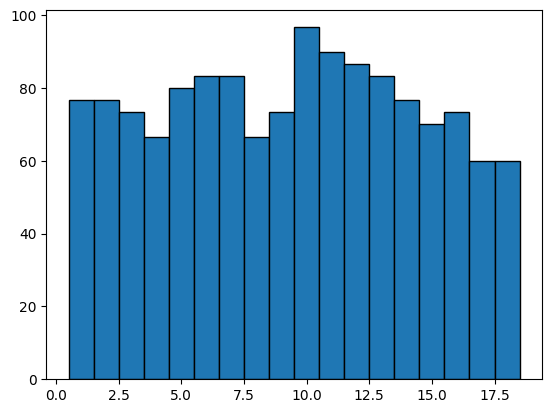

In [20]:
trial_binSize = 30

counter = 0

performances = []

for index in range(n_Trials):

    if (index % trial_binSize == 0 and index != 0):
        performances.append(counter / trial_binSize * 100)
        counter = 0

    if (correctAnswers[index] == response[index]):
        counter += 1


plt.bar(np.arange(np.floor(n_Trials / trial_binSize)) + 1, performances, width=1, edgecolor = 'black')

In [21]:
spikes, timeScale = singlecell.bin_spikes2D(
    spikeTimes, spikeClusters, np.arange(0,877), responseTime, pre_time= 1, post_time=1)

spikes.shape

(545, 877, 200)

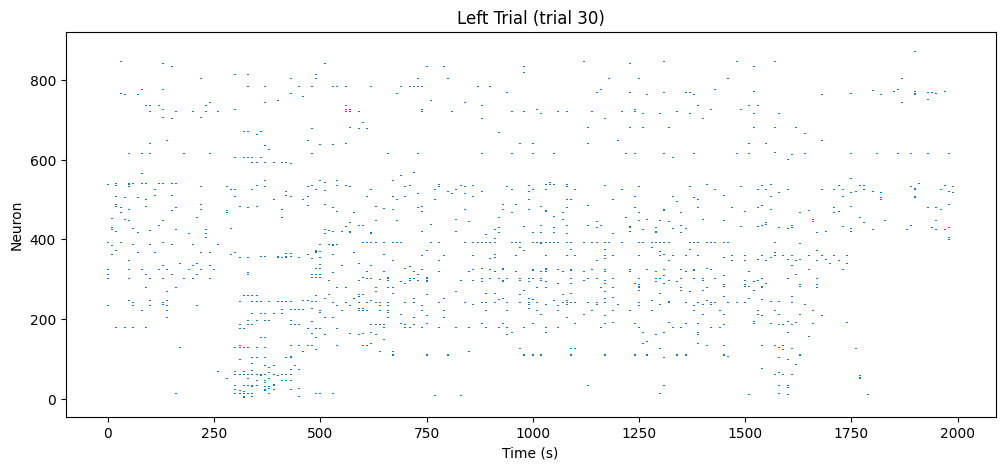

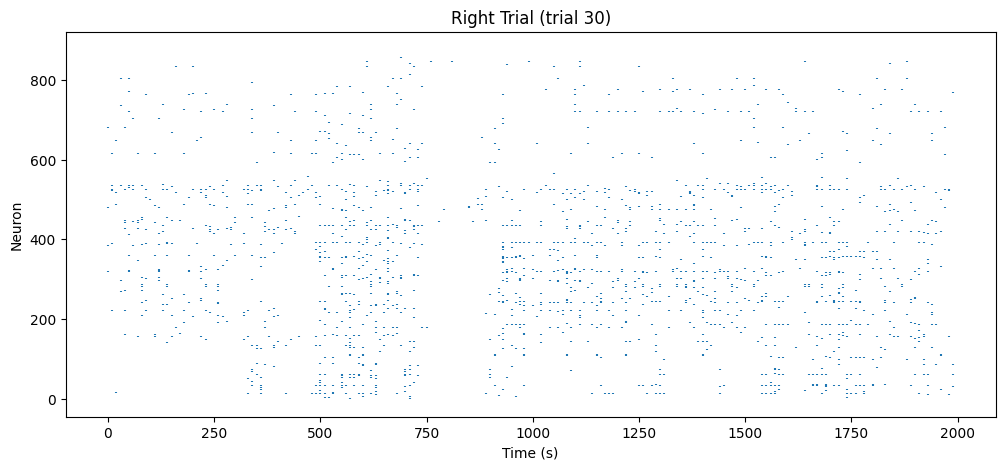

In [22]:
time_binSize = 10

NoGo_trial = spikes[response == 0, :, :]
Left_trial = spikes[response == 1, :, :]
Right_trial = spikes[response == -1, :, :]

# NoGo_trial1 = NoGo_trial[30,:,:]
Left_trial1 = Left_trial[30,:,:]
Right_trial1 = Right_trial[30,:,:]

left_spk_pos = [];
neuron = [];

for index, x in np.ndenumerate(Left_trial1):
    if (index[1] == 0):
        neuron = []
        if (x):
            neuron.append(index[1] * time_binSize)
    elif (index[1] == Left_trial1.shape[1]-1):
        if (x):
            neuron.append(index[1] * time_binSize)

        left_spk_pos.append([])
        if (neuron != []):
            left_spk_pos[index[0]] = neuron
    else:
        if (x):
            neuron.append(index[1] * time_binSize)

# nogo_spk_pos = [];
# neuron = [];

# for index, x in np.ndenumerate(NoGo_trial1):
#     if (index[1] == 0):
#         neuron = []
#         if (x):
#             neuron.append(index[1] * time_binSize)
#     elif (index[1] == NoGo_trial1.shape[1]-1):
#         if (x):
#             neuron.append(index[1] * time_binSize)

#         nogo_spk_pos.append([])
#         if (neuron != []):
#             nogo_spk_pos[index[0]] = neuron
#     else:
#         if (x):
#             neuron.append(index[1] * time_binSize)

right_spk_pos = [];
neuron = [];

for index, x in np.ndenumerate(Right_trial1):
    if (index[1] == 0):
        neuron = []
        if (x):
            neuron.append(index[1] * time_binSize)
    elif (index[1] == Right_trial1.shape[1]-1):
        if (x):
            neuron.append(index[1] * time_binSize)

        right_spk_pos.append([])
        if (neuron != []):
            right_spk_pos[index[0]] = neuron
    else:
        if (x):
            neuron.append(index[1] * time_binSize)

_ = plt.figure(figsize=(12,5))

_ = plt.eventplot(left_spk_pos)
_ = plt.xlabel('Time (s)')
_ = plt.ylabel('Neuron')
_ = plt.title('Left Trial (trial 30)')

# _ = plt.figure(figsize=(12,5))

# _ = plt.eventplot(nogo_spk_pos)
# _ = plt.xlabel('Time (s)')
# _ = plt.ylabel('Neuron')
# _ = plt.title('NoGo Trial (first trial)')

_ = plt.figure(figsize=(12,5))

_ = plt.eventplot(right_spk_pos)
_ = plt.xlabel('Time (s)')
_ = plt.ylabel('Neuron')
_ = plt.title('Right Trial (trial 30)')

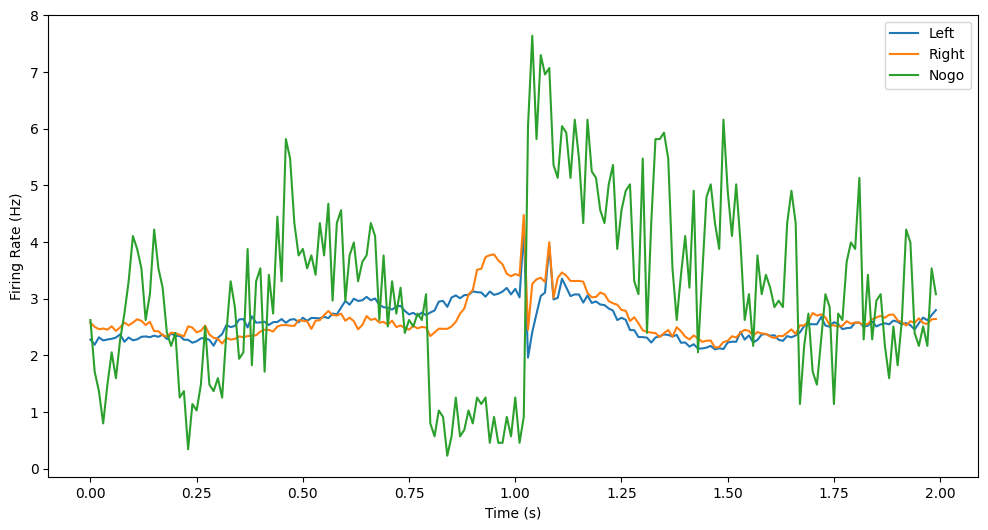

In [23]:
time_binSize = 10

resp_left_spks = spikes[response == 1,:, :]
resp_right_spks = spikes[response == -1,:, :]
resp_nogo_spks = spikes[response == 0, :, :]

left_resp_fr = np.mean(resp_left_spks, (0,1)) * 1000 / time_binSize
right_resp_fr = np.mean(resp_right_spks, (0,1)) * 1000 / time_binSize
nogo_resp_fr = np.mean(resp_nogo_spks, (0,1)) * 1000 / time_binSize

_ = plt.figure(figsize = (12,6))

_ = plt.plot(np.arange(0, spikes.shape[2] * time_binSize / 1000, time_binSize / 1000), left_resp_fr)
_ = plt.plot(np.arange(0, spikes.shape[2] * time_binSize / 1000, time_binSize / 1000), right_resp_fr)
_ = plt.plot(np.arange(0, spikes.shape[2] * time_binSize / 1000, time_binSize / 1000), nogo_resp_fr)

_ = plt.legend(('Left', 'Right', 'Nogo'))
_ = plt.xlabel('Time (s)')
_ = plt.ylabel('Firing Rate (Hz)')

#More behavioral


In [114]:
#help(one.load_object)

trial_data = one.load_object(eid, 'trials', collection='alf')

wheel = one.load_object(eid, 'wheel', collection='alf')
wheelMoves = one.load_object(eid, 'wheelMoves', collection='alf')

right = 'right' # 'left', 'right' or 'body'

camera_right = one.load_object(eid, f'{right}Camera', collection='alf')

left = 'left' # 'left', 'right' or 'body'

camera_left = one.load_object(eid, f'{left}Camera', collection='alf')

label = 'body' # 'left', 'right' or 'body'

camera_body = one.load_object(eid, f'{label}Camera', collection='alf')



In [115]:
camera_left.features

# right camera feature is null why?

,pupilDiameter_raw,pupilDiameter_smooth
0,16.315132,15.096604
1,15.653603,15.363735
2,15.617263,15.612901
3,15.077218,15.844554
4,15.100399,16.059147
...,...,...
239194,13.614682,13.488100
239195,13.635641,13.517009
239196,13.572041,13.561948
239197,13.574647,13.624363


In [116]:
camera_left.times

array([  20.32955558,   20.34595409,   20.36238593, ..., 3946.02165885,
       3946.03805737, 3946.05448921])

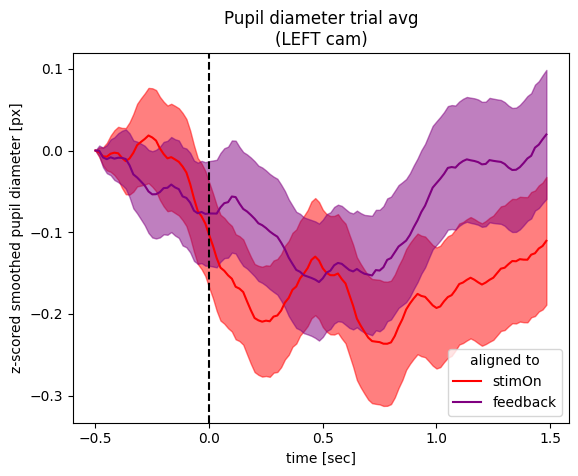

In [117]:
dlc.plot_pupil_diameter_hist(camera_left.features['pupilDiameter_smooth'],camera_left.times, trialsTable[['stimOn_times','feedback_times']]  , cam='left' )

In [118]:
from brainbox.io.one import load_wheel_reaction_times
import brainbox.behavior.wheel as wh
from ibllib.io.extractors.ephys_fpga import extract_wheel_moves
from ibllib.io.extractors.training_wheel import extract_first_movement_times


In [119]:
#dlc.plot_wheel_position(wheel.position ,wheel.timestamps,trialsTable['stimOn_times'])

In [120]:
device_info = ('The wheel diameter is {} cm and the number of ticks is {} per revolution'
               .format(wh.WHEEL_DIAMETER, wh.ENC_RES))
print(device_info)

The wheel diameter is 6.2 cm and the number of ticks is 4096 per revolution


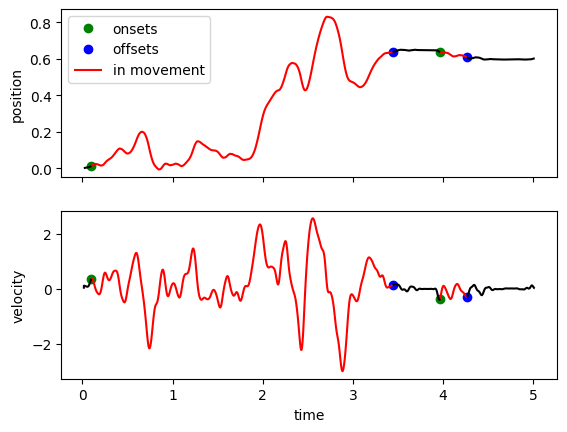

In [121]:
# Convert the pos threshold defaults from samples to correct unit
thresholds_cm = wh.samples_to_cm(np.array([8, 1.5]), resolution=wh.ENC_RES)
thresholds = wh.cm_to_rad(thresholds_cm)

# Detect wheel movements for the first 5 seconds
mask = t < (t[0] + sec)

onsets, offsets, peak_amp, peak_vel_times = wh.movements(
    t[mask], pos[mask], pos_thresh=thresholds[0], pos_thresh_onset=thresholds[0], make_plots=True)
plt.show()

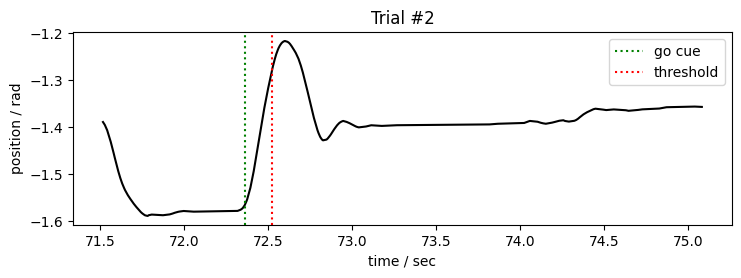

In [122]:
trial_ids = [2]
fig, axs = plt.subplots(1, 1, figsize=(8.5,2.5))

# Plot go cue and response times
goCues = trial_data['goCue_times'][trial_ids]
responses = trial_data['response_times'][trial_ids]

# Plot traces between trial intervals
starts = trial_data['intervals'][trial_ids, 0]
ends = trial_data['intervals'][trial_ids, 1]
# Cut up the wheel vectors
traces = wh.traces_by_trial(t, pos, start=starts, end=ends)
zipped = zip(traces, goCues, responses, trial_ids)

for (trace, go, resp, n) in zipped:
    axs.plot(trace[0], trace[1], 'k-')
    axs.axvline(x=go, color='g', label='go cue', linestyle=':')
    axs.axvline(x=resp, color='r', label='threshold', linestyle=':')
    axs.set_title('Trial #%s' % n)

# Add labels to first
axs.set_xlabel('time / sec')
axs.set_ylabel('position / rad')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/brainbox/behavior/dlc.py:384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials_df['lick_bins'] = [lick_bins[start_idx[i]:end_idx[i]] for i in range(len(start_idx))]
/usr/local/lib/python3.10/dist-packages/brainbox/behavior/dlc.py:386: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials_df['end_idx'] = end_idx


<Axes: title={'center': 'Lick events trial avg'}, xlabel='time [sec]', ylabel='lick events [a.u.]'>

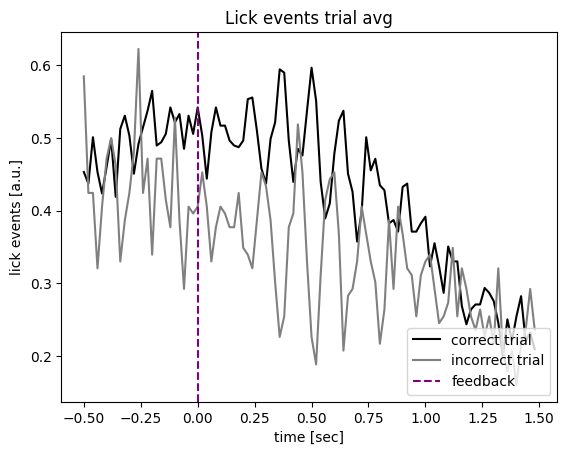

In [124]:
licks = one.load_object(eid, 'licks', collection='alf')

dlc.plot_lick_hist(licks.times, trialsTable[['feedback_times','feedbackType']])

/usr/local/lib/python3.10/dist-packages/brainbox/behavior/dlc.py:384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials_df['lick_bins'] = [lick_bins[start_idx[i]:end_idx[i]] for i in range(len(start_idx))]
/usr/local/lib/python3.10/dist-packages/brainbox/behavior/dlc.py:386: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials_df['end_idx'] = end_idx


<Axes: title={'center': 'Lick events per correct trial'}, xlabel='time [sec]', ylabel='trials'>

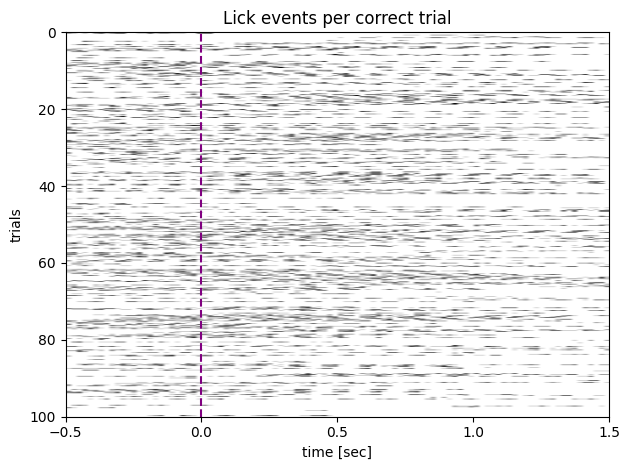

In [125]:
dlc.plot_lick_raster(licks.times, trialsTable[['feedback_times','feedbackType']])

/usr/local/lib/python3.10/dist-packages/brainbox/behavior/dlc.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials_df[f'speed_{feature}'] = [speeds[start_idx[i]:end_idx[i]] for i in range(len(start_idx))]


<Axes: title={'center': 'Paw_r speed trial avg\n(LEFT cam)'}, xlabel='time [sec]', ylabel='speed [px/sec]'>

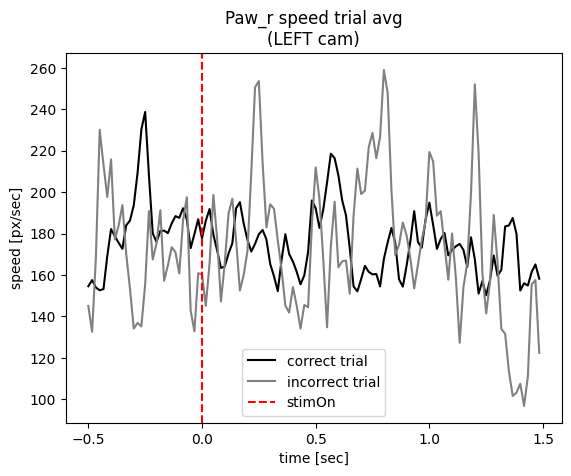

In [130]:
dlc.plot_speed_hist(camera_left.dlc, camera_left.times , trialsTable[['stimOn_times','feedbackType']], feature='paw_r', cam='left', legend=True)


<Axes: title={'center': 'Motion Energy trial avg\n(+/- std)'}, xlabel='time [sec]', ylabel='z-scored motion energy [a.u.]'>

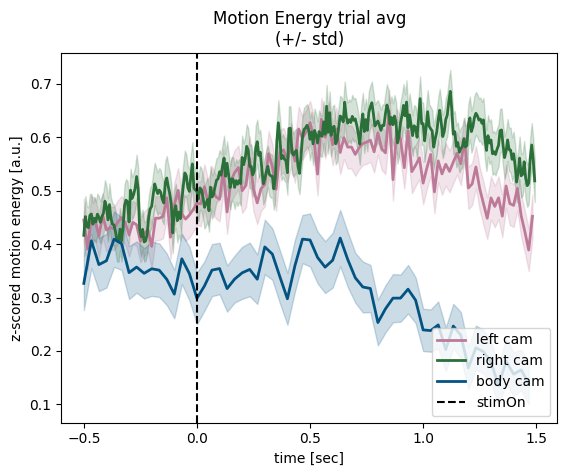

In [138]:
camera_dict={'left': left_dict , 'right': right_dict , 'body': body_dict}

left_dict = {'motion_energy' :  camera_left.ROIMotionEnergy , 'times': camera_left.times}

right_dict = {'motion_energy' :  camera_right.ROIMotionEnergy , 'times': camera_right.times}

body_dict = {'motion_energy' :  camera_body.ROIMotionEnergy , 'times': camera_body.times}

dlc.plot_motion_energy_hist(camera_dict , trialsTable[['stimOn_times']])